In [1]:
#pip install mlxtend

In [2]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

     support                         itemsets
25  0.462513                  (United States)
11  0.131143                          (India)
24  0.100802                 (United Kingdom)
4   0.055792                         (Canada)
8   0.049273                         (France)
14  0.039870                          (Japan)
34  0.034980  (United Kingdom, United States)
20  0.029087                          (Spain)
19  0.028962                    (South Korea)
9   0.028335                        (Germany)
28  0.027207          (Canada, United States)
15  0.021189                         (Mexico)
5   0.020311                          (China)
1   0.020060                      (Australia)
30  0.015672          (France, United States)
7   0.014669                          (Egypt)
23  0.014168                         (Turkey)
10  0.013164                      (Hong Kong)
16  0.012914                        (Nigeria)
13  0.012538                          (Italy)
3   0.012161                      

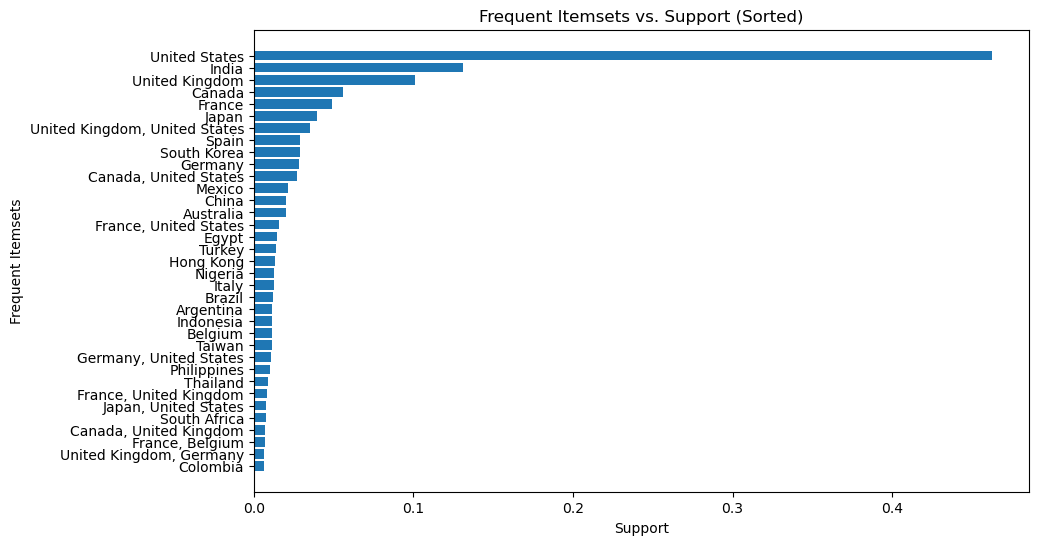

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(Belgium),(France),0.011284,0.049273,0.007146,0.633333,12.853605,1.0,0.006590,2.592892,0.932726,0.133803,0.614330,0.389186
4,(Canada),(United States),0.055792,0.462513,0.027207,0.487640,1.054329,1.0,0.001402,1.049044,0.054574,0.055400,0.046751,0.273232
11,(Germany),(United States),0.028335,0.462513,0.011033,0.389381,0.841881,1.0,-0.002072,0.880233,-0.161983,0.022995,-0.136063,0.206618
13,(United Kingdom),(United States),0.100802,0.462513,0.034980,0.347015,0.750282,1.0,-0.011642,0.823124,-0.270149,0.066208,-0.214884,0.211323
8,(France),(United States),0.049273,0.462513,0.015672,0.318066,0.687692,1.0,-0.007117,0.788181,-0.323262,0.031590,-0.268744,0.175975
10,(Germany),(United Kingdom),0.028335,0.100802,0.006520,0.230088,2.282569,1.0,0.003663,1.167923,0.578283,0.053170,0.143779,0.147383
12,(Japan),(United States),0.039870,0.462513,0.007899,0.198113,0.428341,1.0,-0.010541,0.670278,-0.581591,0.015974,-0.491917,0.107596
6,(France),(United Kingdom),0.049273,0.100802,0.008400,0.170483,1.691264,1.0,0.003433,1.084002,0.429909,0.059292,0.077492,0.126908
0,(France),(Belgium),0.049273,0.011284,0.007146,0.145038,12.853605,1.0,0.006590,1.156445,0.969995,0.133803,0.135281,0.389186
2,(Canada),(United Kingdom),0.055792,0.100802,0.007272,0.130337,1.292996,1.0,0.001648,1.033961,0.239992,0.048699,0.032846,0.101238


In [3]:
    from mlxtend.frequent_patterns import apriori
    from mlxtend.frequent_patterns import association_rules
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    # File path to the dataset
    df = pd.read_csv("netflix_titles.csv")
    df = df[['country']]

    ## Remove rows containing NA values
    df = df.dropna()

    # If the dataset contains multiple countries, split them into separate rows
    df['country'] = df['country'].str.split(', ')
    # Use TransactionEncoder for encoding
    from mlxtend.preprocessing import TransactionEncoder
    te = TransactionEncoder()
    te_ary = te.fit(df['country']).transform(df['country'])
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

    # Find frequent itemsets using min_support as the minimum support threshold
    frequent_itemsets = apriori(df_encoded, min_support=0.0065, use_colnames=True)

    # Sort by support in descending order
    sorted_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
    print(sorted_frequent_itemsets)

    # Assuming frequent_itemsets is a DataFrame containing 'itemsets' and 'support' columns
    # First, sort by the 'support' column in descending order
    sorted_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=True)

    # Extract the sorted data and convert frozenset to a string format
    itemsets = [", ".join(map(str, itemset)) for itemset in sorted_frequent_itemsets['itemsets']]
    support = sorted_frequent_itemsets['support']

    # Create a horizontal bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(itemsets)), support, tick_label=itemsets)
    plt.xlabel('Support')
    plt.ylabel('Frequent Itemsets')
    plt.title('Frequent Itemsets vs. Support (Sorted)')
    plt.show()

    # Generate association rules using confidence as the threshold
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)
    rules

    # Sort the rules by the 'confidence' column in descending order
    sorted_rules = rules.sort_values(by='confidence', ascending=False)
    sorted_rules

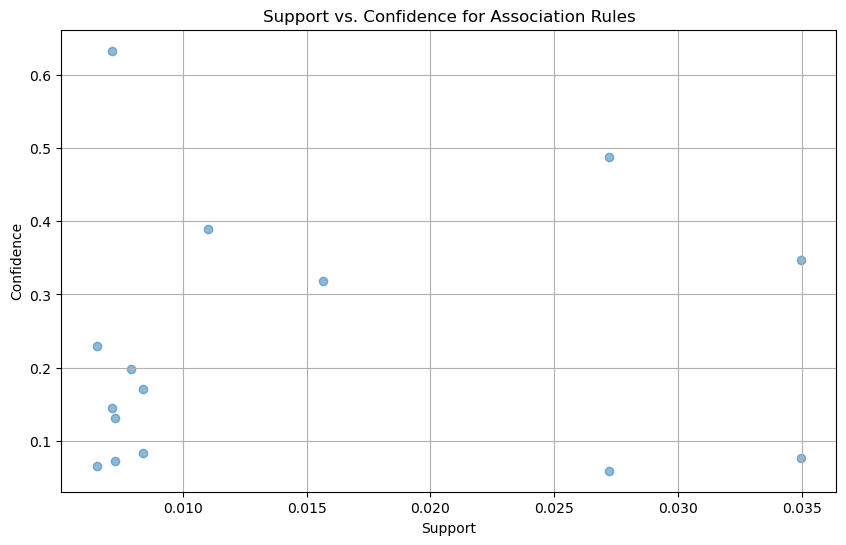

In [4]:
# Creating a DataFrame for Association Rules
rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)

# Creating a Scatter Plot for Support and Confidence
plt.figure(figsize=(10, 6))
plt.scatter(rules_df['support'], rules_df['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence for Association Rules')
plt.grid(True)
plt.show()